In [3]:
# https://data-flair.training/blogs/scipy-linear-algebra/

In [11]:
from scipy import linalg

In [12]:
import numpy as np

In [14]:
a = np.array([[3,3,2], [4,1,2], [1,5,4]])
b = np.array([4,4,6])
x = linalg.solve(a,b)
print(x)

[0.36363636 0.18181818 1.18181818]


In [15]:
A = np.array([[5,2,5],[4,1,2],[6,3,6]])
#The determinant function
x = linalg.det(A)
print (x)

5.999999999999998


In [16]:
A = np.array([[5,5],[8,8]])
#Passing the values to the eigen function
val, vect = linalg.eig(A)
#Eigen values
print(val)
#Eigen vectors
print(vect)

[ 0.+0.j 13.+0.j]
[[-0.70710678 -0.52999894]
 [ 0.70710678 -0.8479983 ]]


Unlike the Eigenvalues and vectors which can compute values only for square matrices, we have the SVD. Standard Value Decomposition is for matrices that are not square in shape.

In [18]:
a = np.array([[5,5],[8,8]]) 
#Passing the values to the eigen function
a,b,c = linalg.svd(a)
print(a,b,c)

[[-0.52999894 -0.8479983 ]
 [-0.8479983   0.52999894]] [1.33416641e+01 7.40222004e-16] [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


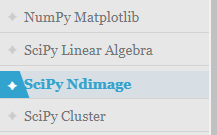

In [19]:
# https://data-flair.training/blogs/scipy-image-manipulation-processing/

In [26]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

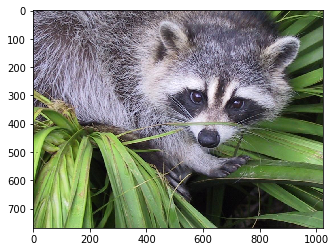

In [23]:
f = misc.face()
plt.imshow(f)
plt.show()

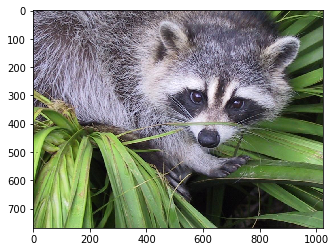

In [25]:
plt.imshow(f)

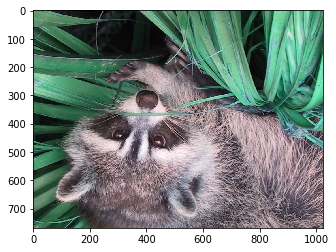

In [28]:
flip_face = np.flip(f)
plt.imshow(flip_face)

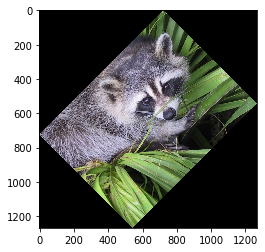

In [30]:
from scipy import misc, ndimage
#rotate functiom
rotate_face = ndimage.rotate(f, 45)  
  
plt.imshow(rotate_face)  
plt.show() 

# SciPy Image Filters

We can also modify the images by applying different filters over the images in SciPy. We highlight some sections of the image and implement these filters along with other concepts. The functions apply pixel algorithms to apply filters on the images.

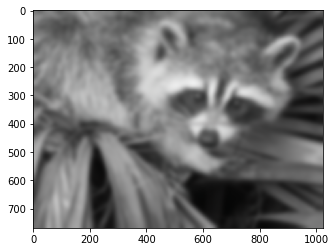

In [33]:
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
face = misc.face()

blurred_img = ndimage.gaussian_filter(face, 8)
plt.imshow(blurred_img)
plt.show()


In [34]:
zx = ndimage.sobel(blurred_img, axis = 0, mode = 'constant')  
zy = ndimage.sobel(blurred_img, axis = 1, mode = 'constant')  
sobl = np.hypot(zx, zy)  
plt.imshow(sobl)  
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

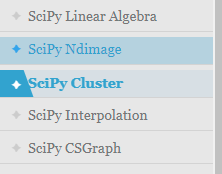

# SciPy Cluster – K-Means Clustering and Hierarchical Clustering

# Implementation of K-means

In [166]:
import scipy
from scipy.cluster.vq import kmeans, vq, whiten
import numpy as np
# data generation

data = np.array([[  1.9,2.3,1.7],
                 [  1.5,2.5,2.2],
                 [  0.8,0.6,1.7]])

In [167]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.whiten.html

Normalize a group of observations on a per feature basis.

Before running k-means, it is beneficial to rescale each feature dimension of the observation set by its standard deviation (i.e. “whiten” it - as in “white noise” where each frequency has equal power). Each feature is divided by its standard deviation across all observations to give it unit variance.

So, we then we whiten the data. We use the whitening function to linearly transform the data set. It then produces uncorrelated data having variance 1.

In [168]:
data = whiten(data)
data

array([[4.17944278, 2.69811351, 7.21248917],
       [3.29956009, 2.93273208, 9.33380951],
       [1.75976538, 0.7038557 , 7.21248917]])

In [171]:
np.var(data, axis=0)

array([1., 1., 1.])

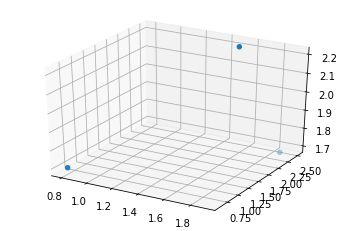

In [156]:
data = np.array([[  1.9,2.3,1.7],
                 [  1.5,2.5,2.2],
                 [  0.8,0.6,1.7]])
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
x=data[:,0]
y=data[:,1]
z=data[:,2]
ax.scatter(x, y, z, 'green')
plt.show()

In [144]:
data[:,0]

array([4.17944278, 3.29956009, 1.75976538])

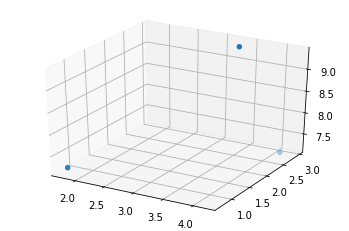

In [153]:
# https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
x=data[:,0]
y=data[:,1]
z=data[:,2]
ax.scatter(x, y, z, 'green')
plt.show()

We now perform clustering on the data set. The process iterates until we find the final cluster center.

In [158]:
from scipy.cluster.vq import kmeans
centroids = kmeans(data,3)
print(centroids)

(array([[1.9, 2.3, 1.7],
       [1.5, 2.5, 2.2],
       [0.8, 0.6, 1.7]]), 0.0)


We now implement the vq function. The vq function assigns the centroid to the closest cluster. The function returns the cluster for each observation and also the distortion.

In [ ]:
from numpy import array


https://www.youtube.com/watch?v=1XqG0kaJVHY

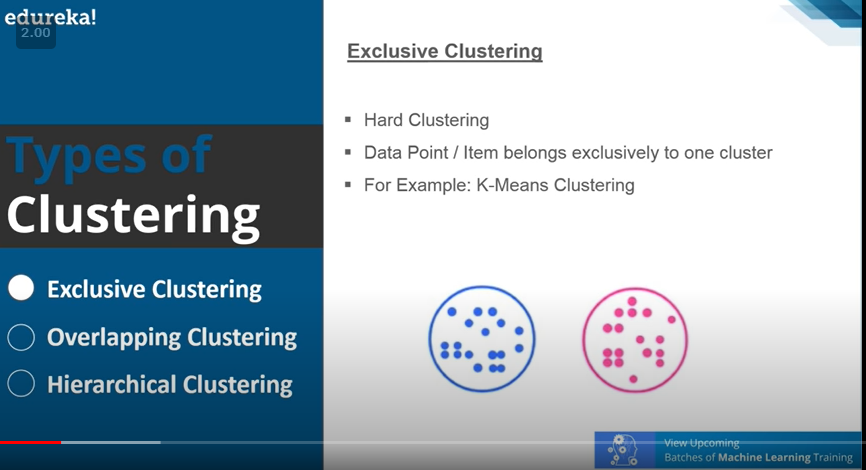

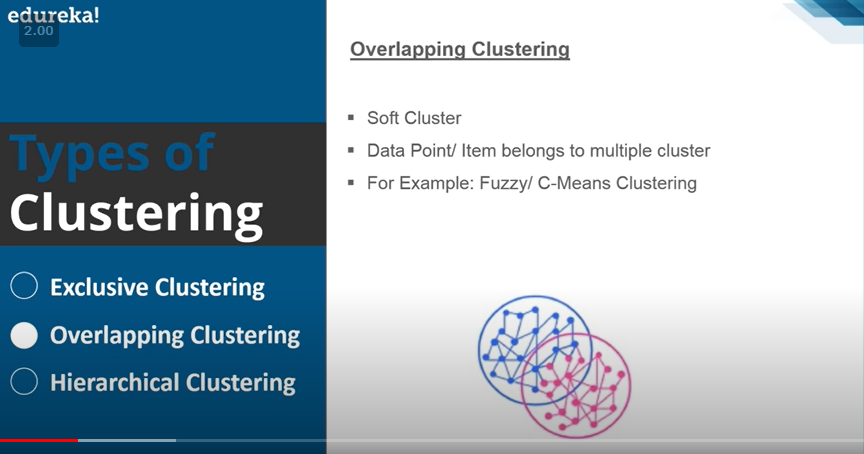

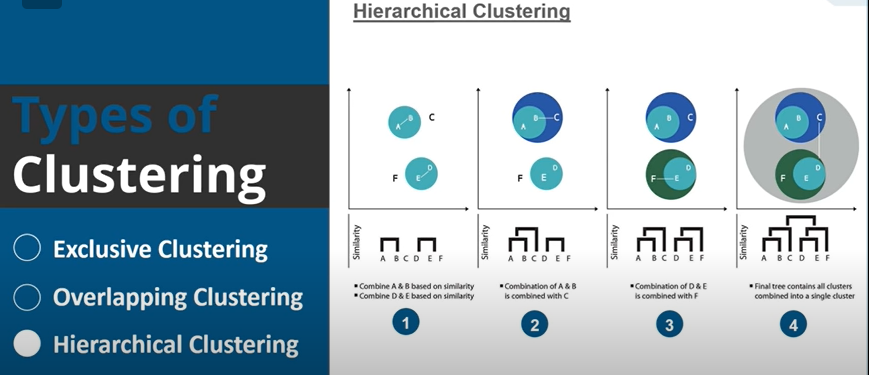

In [46]:
# code from scratch:
# check another file

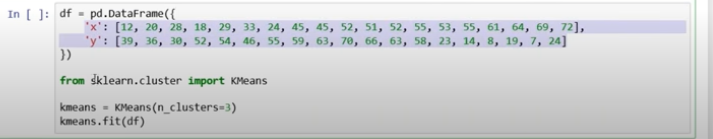

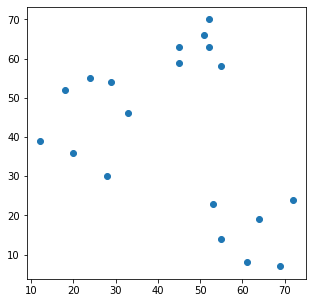

In [84]:
# using sklearn - https://youtu.be/1XqG0kaJVHY?t=1516  (Video URL at current time)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'])
plt.show()

In [75]:
from sklearn.cluster import KMeans # KMeans is predefined lib which comes under sklearn

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [104]:
labels

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [114]:
centroids

array([[50.        , 63.16666667],
       [23.42857143, 44.57142857],
       [62.33333333, 15.83333333]])

In [109]:
centroids.shape

(3, 2)

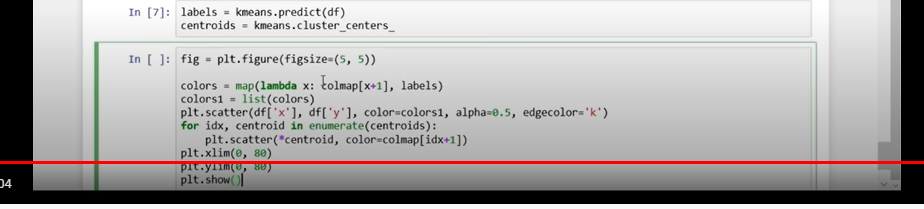

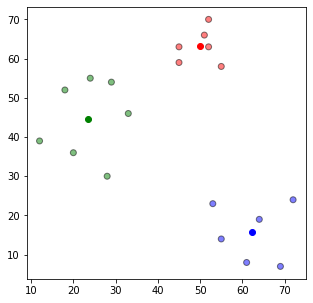

In [125]:
fig = plt.figure(figsize=(5,5))
colmap = { 1:'r', 2:'g', 3:'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

plt.scatter(df['x'],df['y'], color = colors1, alpha = 0.5, edgecolor = 'k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])

#centroids2 = np.array(centroids)    
#for idx, centroid in np.ndenumerate(centroids2):
#    plt.scatter(centroid, color = colmap[idx+1])

plt.show()

In [118]:
for i in centroids:
    print(*centroids)

[50.         63.16666667] [23.42857143 44.57142857] [62.33333333 15.83333333]
[50.         63.16666667] [23.42857143 44.57142857] [62.33333333 15.83333333]
[50.         63.16666667] [23.42857143 44.57142857] [62.33333333 15.83333333]


In [119]:
centroids

array([[50.        , 63.16666667],
       [23.42857143, 44.57142857],
       [62.33333333, 15.83333333]])

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html

In [205]:
from numpy import array
from scipy.cluster.vq import kmeans, vq, whiten
import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])

In [206]:
whitened = whiten(features)
np.var(whitened, axis=0)

array([1., 1.])

In [207]:
whitened

array([[2.73959671, 2.91001406],
       [2.16283951, 3.16305876],
       [1.15351441, 0.7591341 ],
       [0.5767572 , 2.27740231],
       [0.1441893 , 0.12652235],
       [0.2883786 , 2.27740231],
       [2.88378601, 0.63261175],
       [0.4325679 , 1.89783526],
       [1.44189301, 1.2652235 ]])

In [208]:
book = np.array((whitened[0],whitened[2]))
whitened[0]

array([2.73959671, 2.91001406])

In [229]:
kmeans(whitened,book) # by initializing centroids

(array([[2.45121811, 3.03653641],
        [0.98872663, 1.31944737]]), 0.9088234961964715)

In [230]:
#from numpy import random
#random.seed((1000,2000))
#codes = 3
kmeans(whitened,2) # or by specifying no. of centroids

(array([[0.98872663, 1.31944737],
        [2.45121811, 3.03653641]]), 0.9088234961964715)

In [260]:
from numpy import random
import numpy
random.seed(2) ; random.rand(4) # if we use seed(0), then the output of the random will be same

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239])

In [242]:
# Create 50 datapoints in two clusters a and b

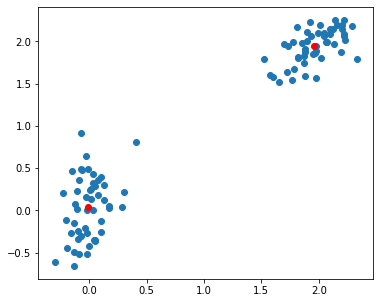

In [267]:
# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.figure(figsize=(6,5))
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], color='r')
plt.show()

In [269]:
codebook

array([[-0.0088554 ,  0.0350829 ],
       [ 1.96321144,  1.94314534]])

In [270]:
codebook.shape

(2, 2)

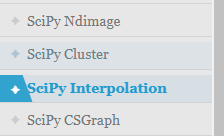

# SciPy Interpolation

Interpolation is basically looking between two data points for the estimation of the value in between the two. It is generally used in any field requiring value estimation from a set of data.

The meaning of the word interpolation is split as “inter” which means “enter”, that means estimating a set of data by looking into it.

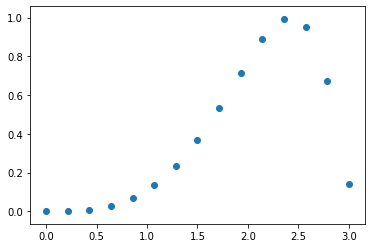

In [284]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3,15)
y = np.sin(x**3/9) # one * is extra!
plt.scatter(x,y)
plt.show()

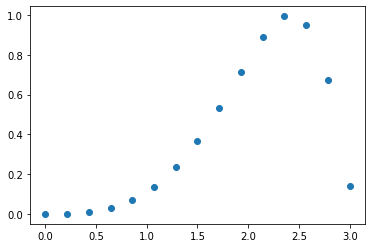

In [286]:
plt.plot(x,y,'o')

# 1D Interpolation in SciPy

The interpolation module provides the interp1d class that is meant to create functions on the basis of the input data set. 

Linear
Nearest
Cubic
Zero
S-linear
Quadratic

The syntax for 1 D interpolation is:
# func = interp1d(x, y ,kind = ‘ ‘)

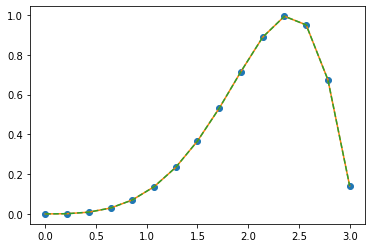

In [294]:
from scipy.interpolate import interp1d  
f1 = interp1d(x, y,kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')
plt.plot(x, y, 'o', x, f1(x), '-', x, f2(x), '--')
plt.show()


In [300]:
f1(x)

array([0.        , 0.00109329, 0.00874624, 0.02951466, 0.06991376,
       0.13623681, 0.23396278, 0.36627253, 0.53098857, 0.7152709 ,
       0.88814574, 0.99332329, 0.94973234, 0.67401073, 0.14112001])

In [304]:
print(x)
print(len(x))

[0.         0.21428571 0.42857143 0.64285714 0.85714286 1.07142857
 1.28571429 1.5        1.71428571 1.92857143 2.14285714 2.35714286
 2.57142857 2.78571429 3.        ]
15


# Splines in SciPy

It is a tool for smoothening of the curves. It is an ancient method where pins were placed along the curve for obtaining smooth curves. The spline technique is like using a flexible strip at selective points to obtain a smooth curve.

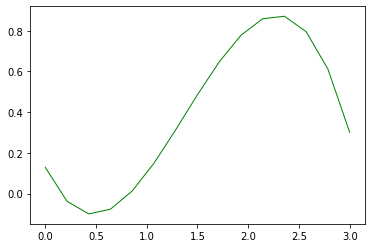

In [316]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

x = np.linspace(0,3,15)
y = np.sin(x**3/9) # one * is extra
spl = UnivariateSpline(x,y)
plt.plot(x, spl(x), 'g', lw=1)
plt.show()

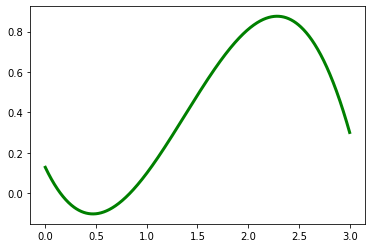

In [314]:
import matplotlib.pyplot as plt  
import numpy as np  
from scipy.interpolate import UnivariateSpline  
x = np.linspace(0, 3,15)  
y = np.sin(x**3/9)  
spl = UnivariateSpline(x, y)
xs = np.linspace(0, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
plt.show()

# Summary

SciPy includes all the necessary scientific and mathematical functions. The library contains additional sub-packages of which Interpolation is one. The package has very useful functions for statistical operations.

These are actually useful when determining an intermediate data value from a given data set. It has its use in many sectors including business and many other scientific fields.

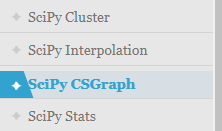

# SciPy CSGraph – Compressed Sparse Graph in SciPy

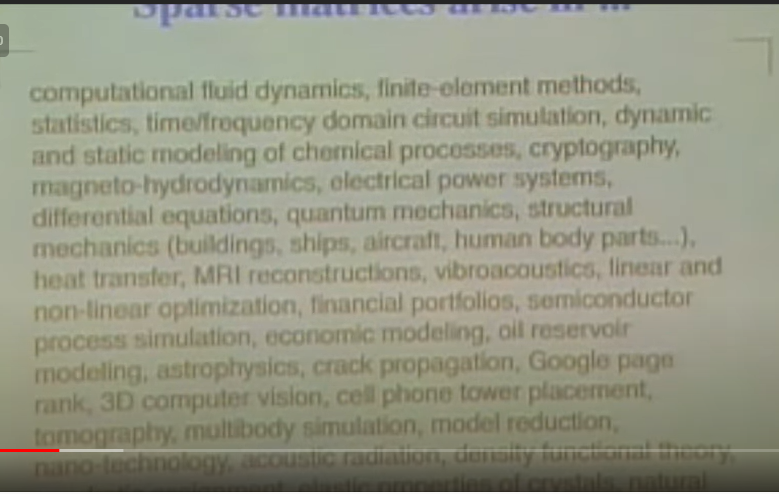

In [317]:
# https://www.youtube.com/watch?v=1dGRTOwBkQs

In [319]:
import numpy as np
import scipy
from scipy.sparse import csr_matrix

#dense representation
G_dense = np.array([ [0, 2, 1],
                     [2, 0, 0],
                     [1, 0, 0] ])
print(G_dense,'\n')

[[0 2 1]
 [2 0 0]
 [1 0 0]] 



In [320]:
#masked representation
G_masked = np.ma.masked_values(G_dense, 0)
print(G_masked,'\n')

[[-- 2 1]
 [2 -- --]
 [1 -- --]] 



In [321]:
#sparse representation
G_sparse = csr_matrix(G_dense)
print (G_sparse.data)

[2 1 2 1]


In [322]:
import numpy as np
import scipy
from scipy.sparse.csgraph import csgraph_from_dense
 
G2_data = np.array([[np.inf, 2,      0     ],
                    [2,      np.inf, np.inf],
                    [0,      np.inf, np.inf]])
print(G2_data,'\n')

[[inf  2.  0.]
 [ 2. inf inf]
 [ 0. inf inf]] 



In [323]:
# later when required!!!

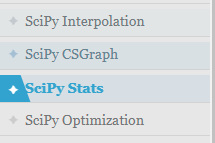

# SciPy Stats – Statistical Functions in SciPy

In [325]:
from scipy import stats  
a = stats.norm.rvs(loc = 2, scale = 1, size = (10,5))  
print(stats.ttest_1samp(a,2.0)) 

Ttest_1sampResult(statistic=array([ 1.23922288,  0.01443648,  0.82499061,  0.79724865, -0.10822583]), pvalue=array([0.24660477, 0.98879672, 0.43069952, 0.44582924, 0.91619095]))


In [327]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

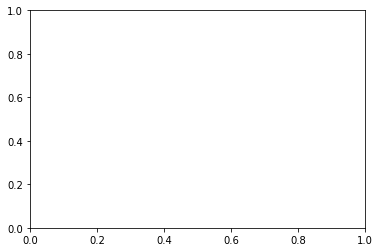

In [328]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [329]:
mean, var, skew, kurt = uniform.stats(moments='mvsk')

In [341]:
# Display the probability density function (pdf):
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

In [336]:
a=np.array([2,-1,4,1,3,0])

sd1=np.std(a)

In [340]:
a[1]/sd1

-0.5855400437691199

#  Python tutorial: Cumulative Distribution Functions

https://www.youtube.com/watch?v=ap4mfGvgDsM    - Python tutorial: Cumulative Distribution Functions

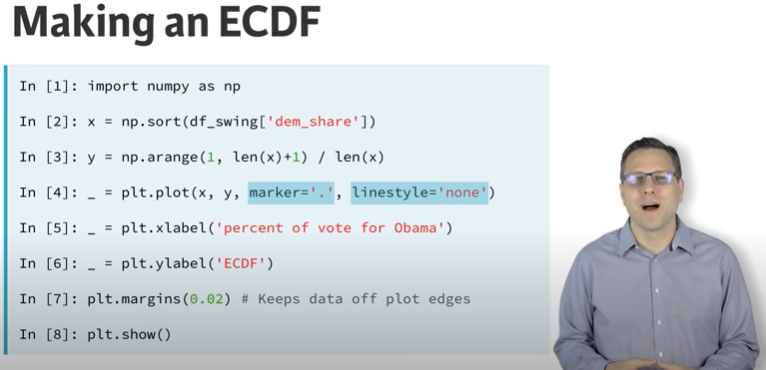

# Statistics basics. Working with probability distributions in SciPy

https://www.youtube.com/watch?v=biuz0yS8Z5Y   - Statistics basics. Working with probability distributions in SciPy

In [344]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
## Example: normal distribution
### Generate random values
np.random.seed(0)
x_rand = np.random.normal(loc=0, scale = 1, size = 1000)

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.04614305, -2.75586815, -2.46559324, -2.17531833, -1.88504342,
        -1.59476851, -1.3044936 , -1.0142187 , -0.72394379, -0.43366888,
        -0.14339397,  0.14688094,  0.43715585,  0.72743075,  1.01770566,
         1.30798057,  1.59825548,  1.88853039,  2.1788053 ,  2.46908021,
         2.75935511]),
 <a list of 20 Patch objects>)

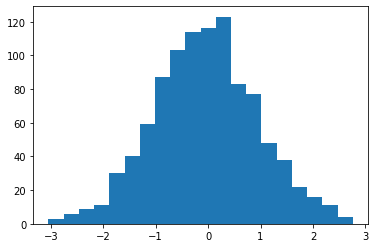

In [350]:
# Visualization
plt.hist(x_rand, bins=20)

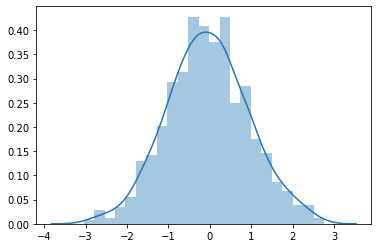

In [352]:
sns.distplot(x_rand)

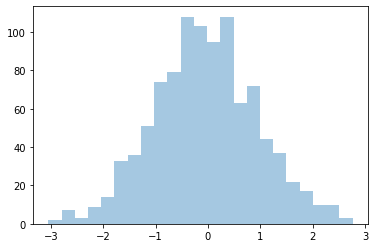

In [354]:
sns.distplot(x_rand, kde=False) # it itself check what the best number of bins is

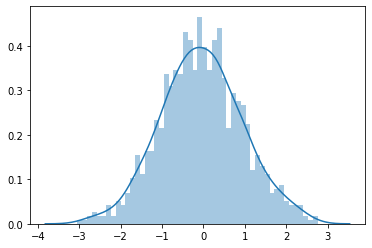

In [358]:
sns.distplot(x_rand, bins = 50, kde = True) # kernel density estimator - for smooth curve

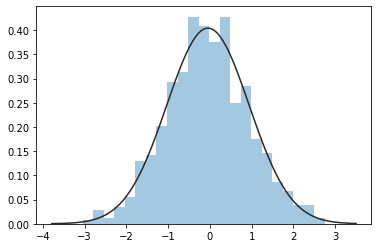

In [383]:
sns.distplot(x_rand, fit=stats.norm, kde = 0)

In [398]:
# Distribution fitting
loc, scale = stats.norm.fit(x_rand)
loc, scale  # mean, standard deviation

(-0.045256707490195384, 0.9870331586690257)

In [385]:
## Prob density function (PDF)
# linearly spaced values of x will be created
x_lin = np.linspace(-5,5,100)

In [386]:
# pdf
pdf =stats.norm.pdf(x_lin, loc=loc, scale = scale)

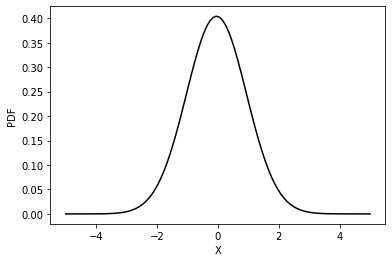

In [388]:
# visualize it now
plt.plot(x_lin, pdf, c='black')
plt.xlabel('X'), plt.ylabel('PDF');

In [389]:
### cumillative distrib function (CDF), 
cdf = stats.norm.cdf(x_lin, loc = loc, scale = scale)


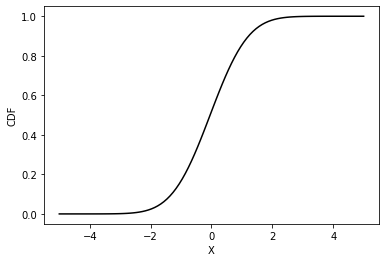

In [390]:
# visualize it now
plt.plot(x_lin, cdf, c='black')
plt.xlabel('X'), plt.ylabel('CDF');

In [393]:
# Percent point function (PPF)
# linearly spaced values of CDF
cdf_ = np.linspace(0,1,1000)

(1000,)

In [395]:
# 'x'
x_ = stats.norm.ppf(cdf_, loc=loc, scale=scale)

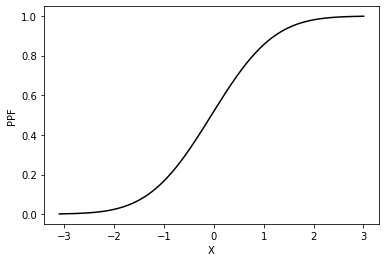

In [397]:
# plot
# visualize it now
plt.plot(x_, cdf_, c='black')
plt.xlabel('X'), plt.ylabel('PPF');

In [ ]:
## Use of CDF - means what is the - @ 21:06 time


In [ ]:
## value of x that is not exceeding 99% of the time - @ 21:45 time


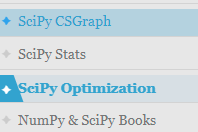

# SciPy Optimization – Unconstrained, Constrained, Least- Square, Univariate Minimization

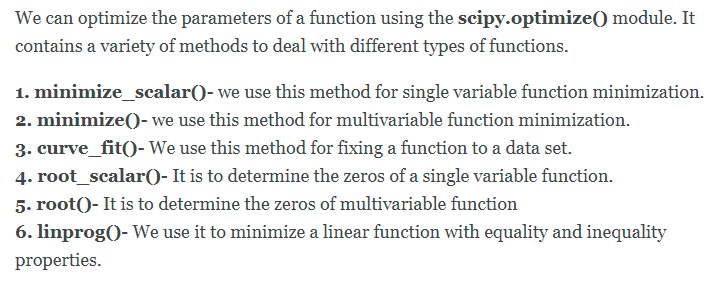

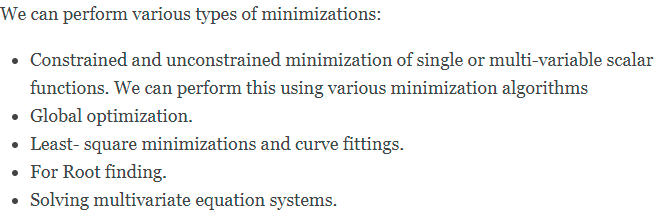

In [401]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.9, 0.7, 3.4, 1.6, 2.1])
res = minimize(rosen, x0, method='nelder-mead')
print(res.x)

[1.00000028 0.99999778 0.99999712 0.9999944  0.99998762]


1. Nelder-Mead Simplex Algorithm in SciPy
2. Powell Algorithm in SciPy
- SciPy Least- Square Minimization
1. Root Finding 
2. Fixed-Point solving
3. Equation system
- SciPy Univariate Minimization - .‘brent’ method for unconstrained minimization and For bounded univariate minimizations, we use the ‘bounded’ method.
